# Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Dataset

In [2]:
data = pd.read_csv('Iris.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
X = data.drop('Species',axis=1)
y= data['Species']

# Step 3: Split the Data

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


# Step 4: Feature Scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
X_train_scaled

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

# Step 5: Initialize and Train the Model

In [16]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

# Step 6: Make Predictions

In [18]:
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the Model

**Precision:** How many detected elements were relevant.
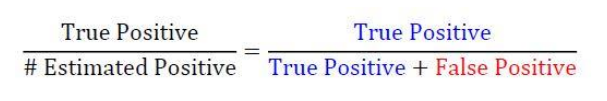

**Recall:** How many relevant elements were detected.
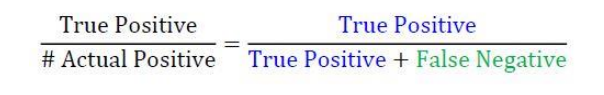

In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



**F1Score:**
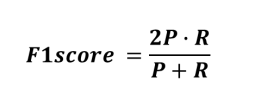

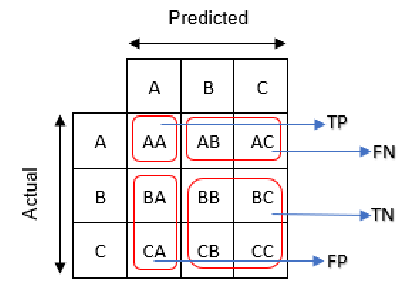

# Step 8: Save the model to a file

In [20]:
model_filename = 'reg_model'
dump(model, model_filename)

print("Model saved successfully")

Model saved successfully


In [21]:
import warnings
warnings.filterwarnings("ignore")

# Iterate over each row in the test set
for i in range(len(X_test)):
    # Extract input features for the current row
    input_features = X_test.iloc[i]
    
    # Get the actual output for the current row
    actual_output = y_test.iloc[i]
    
    # Predict the output for the current row
    input_features_scaled = scaler.transform([input_features])  # Scale input features
    predicted_output = model.predict(input_features_scaled)[0]  # Predict output
    
    # Print input features, predicted output, and actual output
    print("Input Features:", input_features.values)
    print("Predicted Output:", predicted_output)
    print("Actual Output:", actual_output)
    print("------------------------------------")

Input Features: [6.1 2.8 4.7 1.2]
Predicted Output: Iris-versicolor
Actual Output: Iris-versicolor
------------------------------------
Input Features: [5.7 3.8 1.7 0.3]
Predicted Output: Iris-setosa
Actual Output: Iris-setosa
------------------------------------
Input Features: [7.7 2.6 6.9 2.3]
Predicted Output: Iris-virginica
Actual Output: Iris-virginica
------------------------------------
Input Features: [6.  2.9 4.5 1.5]
Predicted Output: Iris-versicolor
Actual Output: Iris-versicolor
------------------------------------
Input Features: [6.8 2.8 4.8 1.4]
Predicted Output: Iris-versicolor
Actual Output: Iris-versicolor
------------------------------------
Input Features: [5.4 3.4 1.5 0.4]
Predicted Output: Iris-setosa
Actual Output: Iris-setosa
------------------------------------
Input Features: [5.6 2.9 3.6 1.3]
Predicted Output: Iris-versicolor
Actual Output: Iris-versicolor
------------------------------------
Input Features: [6.9 3.1 5.1 2.3]
Predicted Output: Iris-virginica